In [6]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a64c796d97ed68b62f3c37ff8fa4295d


In [3]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a64c796d97ed68b62f3c37ff8fa4295d&q=Boston


In [4]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":25.09,"feels_like":15.76,"temp_min":21,"temp_max":28.99,"pressure":1027,"humidity":42},"visibility":16093,"wind":{"speed":5.82,"deg":300,"gust":12.75},"clouds":{"all":1},"dt":1582181163,"sys":{"type":1,"id":4210,"country":"US","sunrise":1582198472,"sunset":1582237310},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [10]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 25.09,
  'feels_like': 15.76,
  'temp_min': 21,
  'temp_max': 28.99,
  'pressure': 1027,
  'humidity': 42},
 'visibility': 16093,
 'wind': {'speed': 5.82, 'deg': 300, 'gust': 12.75},
 'clouds': {'all': 1},
 'dt': 1582181163,
 'sys': {'type': 1,
  'id': 4210,
  'country': 'US',
  'sunrise': 1582198472,
  'sunset': 1582237310},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [13]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a64c796d97ed68b62f3c37ff8fa4295d&q=Bston


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
print(city_url)

City Weather found.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a64c796d97ed68b62f3c37ff8fa4295d&q=Boston


In [16]:
# Get the JSON data.
boston_data = city_weather.json()

In [17]:
boston_data['sys']

{'type': 1,
 'id': 4210,
 'country': 'US',
 'sunrise': 1582198472,
 'sunset': 1582237310}

In [18]:
boston_data['sys']['country']

'US'

In [19]:
boston_data['coord']['lat']

42.36

In [20]:
boston_data['main']['temp_max']

28.4

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 28.4 42 1 5.82


In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-02-20 06:53:07'

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1582184525.8968003

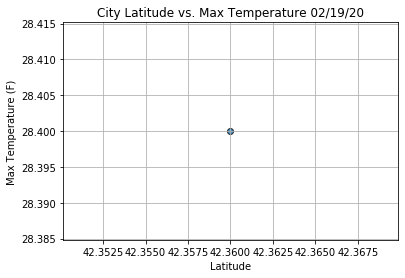

In [29]:
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lat,
            max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()